In [1]:
import os
# os.environ['APP_HOST'] = 'http://192.168.60.25:8005'
os.environ['USER_ID'] = 'abbd86d4-d3c0-48d4-be5a-a6cefd22002b'
os.environ['PROJECT_ID'] = '9d9bca30-a314-4f93-b9c2-f368a0b0135b'
os.environ['TENANT_ID'] = 'cb7d3189-7b2d-4d72-951f-a70a79931f52'

import sys
sys.version
sys.path.append('/Users/phaneendra/IdeaProjects/razor-sdk')

In [2]:
from razor import Block, Pipeline, inputs, outputs

Couldn't setup host configurations. You may not be running this in the platform's Jupyter
Failed to load configuration file. Using default configs


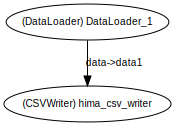

In [3]:
import numpy as np
from razor import Block, inputs, outputs, Pipeline
from razor.platform import project_space_path

@inputs.atomic.generic(name="load_path")
@outputs.series.generic("data")
class DataLoader(Block):
    def run(self, load_path, data):
        for i in range(4):
            data.put({"input_buffer": np.ones([298, 298, 3]).astype(float), "label_buffer": np.ones(1).astype(np.float32)})



@inputs.series.generic("data1")
@inputs.atomic.generic("path")
class CSVWriter(Block):
    def run(self, path, data1):
        print(f"path is: {path}")
        import os
        import pandas as pd
        print(f"path for ===::: ::: {project_space_path(path)}")
        if os.path.exists(project_space_path(path)):
            os.remove(project_space_path(path))
        for batch in data1:
            print(f"batch is {batch}")

train_loader = DataLoader()
csv_writer = CSVWriter("hima_csv_writer").path("hub_engine.csv").data1(train_loader.data)

pipeline = Pipeline(targets=[csv_writer], name="hima_pipeline")
pipeline.show()



In [4]:
import razor
deployed_pipeline= razor.platform.engines(name='Engine-1-dev1').execute(pipeline=pipeline)

In [5]:
deployed_pipeline.monitor()

deployed_pipeline.metrics().plot()

Pipeline Progress: [####################] 100.0% - Success


alt.VConcatChart(...)

In [6]:
deployed_pipeline.logs()

'No logs available yet. Check back again in sometime.'

In [7]:
# deployed.monitor()